In [1]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Zomato Bnagalore data

df= pd.read_csv(r"D:\aiml\dataset\zomato.csv", header=0)

# Copy the file to back-up

df_bk = df.copy()

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#Renaming the Columns Names

df = df.rename(columns={  'approx_cost(for two people)': 'cost',
                          'listed_in(type)':'type',
                          'listed_in(city)':'city', 
                          'rate':'rating'    
                       })
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rating',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [8]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rating        43942 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  dish_liked    23639 non-null  object
 11  cuisines      51672 non-null  object
 12  cost          51371 non-null  object
 13  reviews_list  51717 non-null  object
 14  menu_item     51717 non-null  object
 15  type          51717 non-null  object
 16  city          51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


In [14]:
df['rating'] = df.rating.replace('NEW', np.NaN)
df['rating'] = df.rating.replace('-', np.NaN)
df.rating = df.rating.astype(str)
df.rating = df.rating.apply(lambda x : x.replace('/5','')).astype(float)

# Data Visualisation

WHich are the top chain restaurants in Bangaluru ??

Text(0.5, 0, 'Number of outlets')

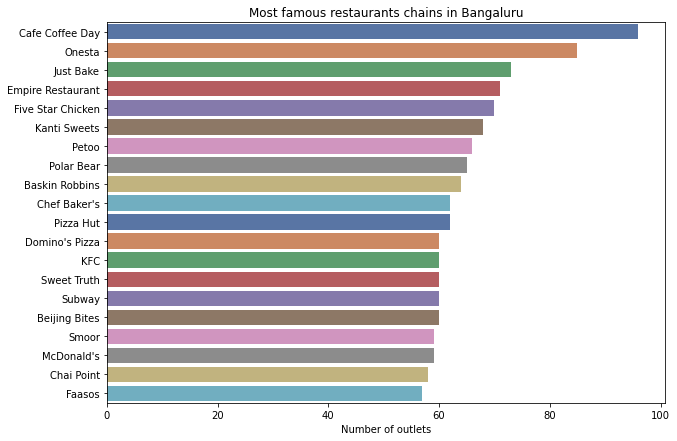

In [11]:
import seaborn as sns
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

what kind of distribution does rating follow ?


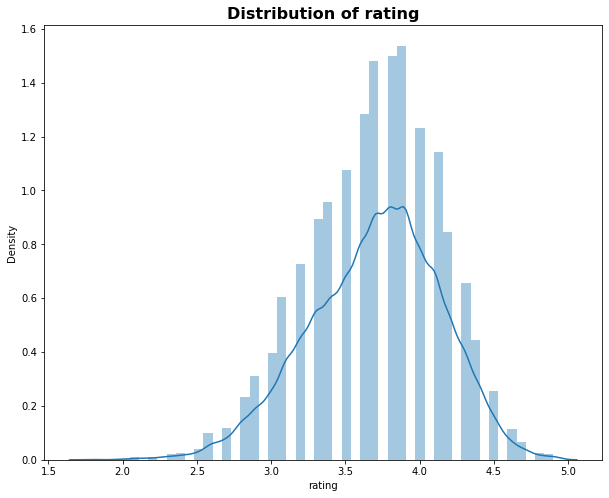

In [16]:
 #Density plot to visualize rate
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.distplot(df['rating'])
plt.title("Distribution of rating", fontsize=16, fontweight='bold')
plt.show()

Observation: More than 50 percent of restaurants have rating between 3 and 4. Restaurants having rating more than 4.5 and less than 2.5 are very rare.


Most Popular Restaurant chains(branches)

Text(0.5, 1.0, 'Top 10 Chain Restaurants')

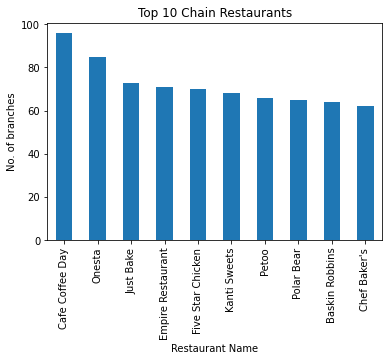

In [17]:
ax=df.name.value_counts()[:10].plot(kind='bar')
plt.xlabel("Restaurant Name")
plt.ylabel("No. of branches")
plt.title("Top 10 Chain Restaurants")

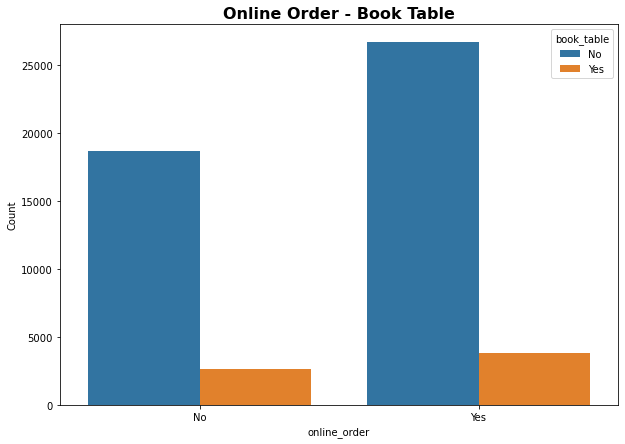

In [18]:
df_online_booking = df.groupby(["online_order", "book_table"]).size().reset_index(name = "Count")
plt.figure(figsize = (10,7))
sns.barplot(x="online_order", y="Count", hue="book_table", data=df_online_booking)
plt.title("Online Order - Book Table", fontsize=16, fontweight='bold')
plt.show()

Observation: We observe that maximum restaurants provide online ordering but not table booking facility. The number of restaurants providing table booking facility but not online order is the least. More than 15000 restaurants don't provide online ordering as well as table booking facility.

# Handling Missing Values

From above, it is found that the column "dish_liked" has more than 50% values , so replace with mode

Dropping the column "dish_liked", "phone", "url" 

In [19]:
#Removing the unnecessary columns form data
df = df.drop(['url','address','phone', 'menu_item', 'reviews_list'],axis=1) 

In [20]:
# Filling missing values using imputer
# SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)

from sklearn.impute import SimpleImputer

imputer_si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df['rating'] = imputer_si.fit_transform(df[['rating']])
df['location'] = imputer_si.fit_transform(df[['location']])
df['cuisines'] = imputer_si.fit_transform(df[['cuisines']])
df['cost'] = imputer_si.fit_transform(df[['cost']])
df['dish_liked'] = imputer_si.fit_transform(df[['dish_liked']])

In [21]:
df['cost'] = df['cost'].apply(lambda x:x.replace(',', ''))

df['cost'] = df['cost'].astype(float)
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [22]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['online_order']=LE.fit_transform(df['online_order'])
df['book_table']=LE.fit_transform(df['book_table'])
df['type']=LE.fit_transform(df['type'])
df['dish_liked']=LE.fit_transform(df['dish_liked'])
df['city']=LE.fit_transform(df['city'])
df['location']=LE.fit_transform(df['location'])
df['rest_type']=LE.fit_transform(df['rest_type'])
df['cuisines']=LE.fit_transform(df['cuisines'])

In [23]:
del df['name']

In [24]:
df.head()

,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,1,1,4.1,775,1,27,3651,2159,800.0,0,1
1,1,0,4.1,787,1,27,2964,952,800.0,0,1
2,1,0,3.8,918,1,22,1416,766,800.0,0,1
3,0,0,3.7,88,1,78,2766,2555,300.0,0,1
4,0,0,3.8,166,4,27,3453,2188,600.0,0,1


In [25]:
df.isna().sum()

online_order    0
book_table      0
rating          0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
type            0
city            0
dtype: int64

In [26]:
df.columns

Index(['online_order', 'book_table', 'rating', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51717 non-null  int32  
 1   book_table    51717 non-null  int32  
 2   rating        51717 non-null  float64
 3   votes         51717 non-null  int64  
 4   location      51717 non-null  int32  
 5   rest_type     51717 non-null  int32  
 6   dish_liked    51717 non-null  int32  
 7   cuisines      51717 non-null  int32  
 8   cost          51717 non-null  float64
 9   type          51717 non-null  int32  
 10  city          51717 non-null  int32  
dtypes: float64(2), int32(8), int64(1)
memory usage: 2.8 MB


In [28]:
df

,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,1,1,4.1,775,1,27,3651,2159,800.0,0,1
1,1,0,4.1,787,1,27,2964,952,800.0,0,1
2,1,0,3.8,918,1,22,1416,766,800.0,0,1
3,0,0,3.7,88,1,78,2766,2555,300.0,0,1
4,0,0,3.8,166,4,27,3453,2188,600.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
51712,0,0,3.6,27,89,8,266,1009,1500.0,6,29
51713,0,0,3.9,0,89,8,266,1391,600.0,6,29
51714,0,0,3.9,0,89,8,266,1391,2000.0,6,29
51715,0,1,4.3,236,26,8,1574,1391,2500.0,6,29


In [29]:
df['rating']=df['rating'].apply(np.ceil)
df['rating'] = df['rating'].astype(int)
df

,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,1,1,5,775,1,27,3651,2159,800.0,0,1
1,1,0,5,787,1,27,2964,952,800.0,0,1
2,1,0,4,918,1,22,1416,766,800.0,0,1
3,0,0,4,88,1,78,2766,2555,300.0,0,1
4,0,0,4,166,4,27,3453,2188,600.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
51712,0,0,4,27,89,8,266,1009,1500.0,6,29
51713,0,0,4,0,89,8,266,1391,600.0,6,29
51714,0,0,4,0,89,8,266,1391,2000.0,6,29
51715,0,1,5,236,26,8,1574,1391,2500.0,6,29


In [30]:
df[df['rating']==5]

,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,1,1,5,775,1,27,3651,2159,800.0,0,1
1,1,0,5,787,1,27,2964,952,800.0,0,1
7,1,1,5,2556,1,29,2013,2324,600.0,1,1
9,1,0,5,504,1,19,5212,767,550.0,1,1
10,1,0,5,402,1,19,5213,579,500.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
51697,1,1,5,1313,89,28,835,222,1800.0,6,29
51699,1,1,5,1218,89,73,1442,191,1200.0,6,29
51700,0,1,5,1003,89,10,2898,1153,1500.0,6,29
51701,1,1,5,673,89,73,1608,1417,1400.0,6,29


# Splitting into train and test

In [31]:
# Identify the independent and Target variables

IndepVar = []
for col in df.columns:
    if col != 'rating':
        IndepVar.append(col)

TargetVar = 'rating'

x = df[IndepVar]
y = df[TargetVar]

In [32]:
#Defining X and Y for model, Train-test split
x = df[["online_order","book_table","votes","location","rest_type","cuisines","cost","type"]]
y = df[['rating']]

In [33]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)

y_train = LE.fit_transform(y_train)
y_test = LE.fit_transform(y_test)


x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((41373, 8), (10344, 8), (41373,), (10344,))

In [34]:
# Load the Results dataset

Results = pd.read_csv(r"D:\aiml\HTResults.csv", header=0)

Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression(multi_class='multinomial', penalty='none', random_state=42,
                   solver='newton-cg')
[[   0    0    0    0]
 [   0    0    1    1]
 [   2  627 7645  859]
 [   0    9  277  923]]
Print Class: 0
TP=0, FN=0, TN=10342, FP=2
Accuracy: 1.0
Precision: 0.0
Sensitivity: nan
F1-Score: 0.0
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 1
TP=0, FN=2, TN=9706, FP=636
Accuracy: 0.938
Precision: 0.0
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 0.939
Balanced Accuracy: 0.47
MCC: -0.004

Print Class: 2
TP=7645, FN=1488, TN=933, FP=278
Accuracy: 0.829
Precision: 0.965
Sensitivity: 0.837
F1-Score: 0.896
Specificity: 0.77
Balanced Accuracy: 0.804
MCC: 0.461

Print Class: 3
TP=923, FN=286, TN=8275, FP=860
Accuracy: 0.889
Precision: 0.518
Sensitivity: 0.763
F1-Score: 0.617
Specificity: 0.906
Balanced Accuracy: 0.834
MCC: 0.569

Overall Performance Prediction:
Accuracy: 91.4%
Precision: 37.075%
Recall or Sensitivity: nan%
F1-Score: 0.3782
Specifici

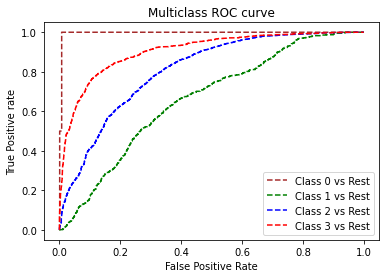

roc_auc_score: 0.818
-----------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
[[   2    0    0    0]
 [   0  557   98    6]
 [   0   73 7771   72]
 [   0    6   54 1705]]
Print Class: 0
TP=2, FN=0, TN=10342, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=557, FN=104, TN=9604, FP=79
Accuracy: 0.982
Precision: 0.876
Sensitivity: 0.843
F1-Score: 0.859
Specificity: 0.992
Balanced Accuracy: 0.918
MCC: 0.85

Print Class: 2
TP=7771, FN=145, TN=2276, FP=152
Accuracy: 0.971
Precision: 0.981
Sensitivity: 0.982
F1-Score: 0.981
Specificity: 0.937
Balanced Accuracy: 0.96
MCC: 0.92

Print Class: 3
TP=1705, FN=60, TN=8501, FP=78
Accuracy: 0.987
Precision: 0.956
Sensitivity: 0.966
F1-Score: 0.961
Specificity: 0.991
Balanced Accuracy: 0.978
MCC: 0.953

Overall Performance Prediction:
Accuracy: 98.5%
Precision: 95.325%
Recall or Sensitivity: 9

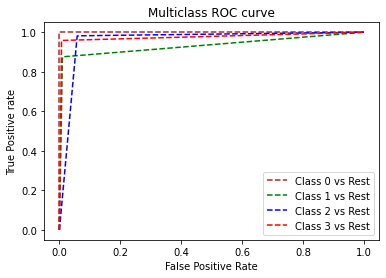

roc_auc_score: 0.967
-----------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
[[   2    0    0    0]
 [   0  485   17    1]
 [   0  149 7870   82]
 [   0    2   36 1700]]
Print Class: 0
TP=2, FN=0, TN=10342, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=485, FN=18, TN=9690, FP=151
Accuracy: 0.984
Precision: 0.763
Sensitivity: 0.964
F1-Score: 0.852
Specificity: 0.985
Balanced Accuracy: 0.974
MCC: 0.85

Print Class: 2
TP=7870, FN=231, TN=2190, FP=53
Accuracy: 0.973
Precision: 0.993
Sensitivity: 0.971
F1-Score: 0.982
Specificity: 0.976
Balanced Accuracy: 0.974
MCC: 0.923

Print Class: 3
TP=1700, FN=38, TN=8523, FP=83
Accuracy: 0.988
Precision: 0.953
Sensitivity: 0.978
F1-Score: 0.966
Specificity: 0.99
Balanced Accuracy: 0.984
MCC: 0.959

Overall Performance Prediction:
Accuracy: 98.625%
Precision: 92.725%
Recall or Sensitivity:

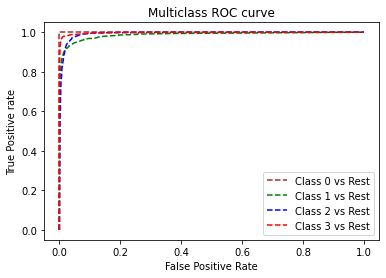

roc_auc_score: 0.994
-----------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
[[   2    0    0    0]
 [   0  480   32    3]
 [   0  151 7853   86]
 [   0    5   38 1694]]
Print Class: 0
TP=2, FN=0, TN=10342, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=480, FN=35, TN=9673, FP=156
Accuracy: 0.982
Precision: 0.755
Sensitivity: 0.932
F1-Score: 0.834
Specificity: 0.984
Balanced Accuracy: 0.958
MCC: 0.83

Print Class: 2
TP=7853, FN=237, TN=2184, FP=70
Accuracy: 0.97
Precision: 0.991
Sensitivity: 0.971
F1-Score: 0.981
Specificity: 0.969
Balanced Accuracy: 0.97
MCC: 0.916

Print Class: 3
TP=1694, FN=43, TN=8518, FP=89
Accuracy: 0.987
Precision: 0.95
Sensitivity: 0.975
F1-Score: 0.962
Specificity: 0.99
Balanced Accuracy: 0.982
MCC: 0.955

Overall Performance Prediction:
Accuracy: 98.475%
Precision: 92.4%
Recall or Sensitivity: 96.95%

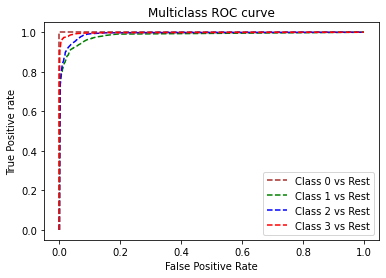

roc_auc_score: 0.993
-----------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
[[   2    0    1    0]
 [   0  418  132   17]
 [   0  209 7624  129]
 [   0    9  166 1637]]
Print Class: 0
TP=2, FN=1, TN=10341, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 0.667
F1-Score: 0.8
Specificity: 1.0
Balanced Accuracy: 0.834
MCC: 0.816

Print Class: 1
TP=418, FN=149, TN=9559, FP=218
Accuracy: 0.965
Precision: 0.657
Sensitivity: 0.737
F1-Score: 0.695
Specificity: 0.978
Balanced Accuracy: 0.857
MCC: 0.677

Print Class: 2
TP=7624, FN=338, TN=2083, FP=299
Accuracy: 0.938
Precision: 0.962
Sensitivity: 0.958
F1-Score: 0.96
Specificity: 0.874
Balanced Accuracy: 0.916
MCC: 0.827

Print Class: 3
TP=1637, FN=175, TN=8386, FP=146
Accuracy: 0.969
Precision: 0.918
Sensitivity: 0.903
F1-Score: 0.911
Specificity: 0.983
Balanced Accuracy: 0.943
MCC: 0.892

Overall Performance Prediction:
Accuracy: 96.8%
Precision: 88.425%
Recall or Sensi

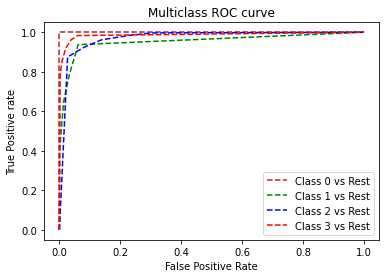

roc_auc_score: 0.977
-----------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
[[   2    4   14    5]
 [   0    0    0    0]
 [   0  620 7297  652]
 [   0   12  612 1126]]
Print Class: 0
TP=2, FN=23, TN=10319, FP=0
Accuracy: 0.998
Precision: 1.0
Sensitivity: 0.08
F1-Score: 0.148
Specificity: 1.0
Balanced Accuracy: 0.54
MCC: 0.283

Print Class: 1
TP=0, FN=0, TN=9708, FP=636
Accuracy: 0.939
Precision: 0.0
Sensitivity: nan
F1-Score: 0.0
Specificity: 0.939
Balanced Accuracy: nan
MCC: nan

Print Class: 2
TP=7297, FN=1272, TN=1149, FP=626
Accuracy: 0.817
Precision: 0.921
Sensitivity: 0.852
F1-Score: 0.885
Specificity: 0.647
Balanced Accuracy: 0.75
MCC: 0.444

Print Class: 3
TP=1126, FN=624, TN=7937, FP=657
Accuracy: 0.876
Precision: 0.632
Sensitivity: 0.643
F1-Score: 0.637
Specificity: 0.924
Balanced Accuracy: 0.784
MCC: 0.563

Overall Performance Prediction:
Accuracy: 90.75%
Precision: 63.825%
Recall or Sensitivity: nan%
F1-Sco

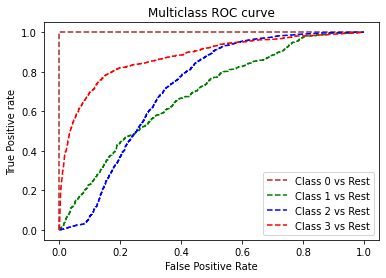

roc_auc_score: 0.819
-----------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
[[   2    0    0    0]
 [   0  552   26    1]
 [   0   83 7862   59]
 [   0    1   35 1723]]
Print Class: 0
TP=2, FN=0, TN=10342, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=552, FN=27, TN=9681, FP=84
Accuracy: 0.989
Precision: 0.868
Sensitivity: 0.953
F1-Score: 0.909
Specificity: 0.991
Balanced Accuracy: 0.972
MCC: 0.904

Print Class: 2
TP=7862, FN=142, TN=2279, FP=61
Accuracy: 0.98
Precision: 0.992
Sensitivity: 0.982
F1-Score: 0.987
Specificity: 0.974
Balanced Accuracy: 0.978
MCC: 0.945

Print Class: 3
TP=1723, FN=36, TN=8525, FP=60
Accuracy: 0.991
Precision: 0.966
Sensitivity: 0.98
F1-Score: 0.973
Specificity: 0.993
Balanced Accuracy: 0.986
MCC: 0.967

Overall Performance Prediction:
Accuracy: 99.0%
Precision: 95.65%
Recall or Sensi

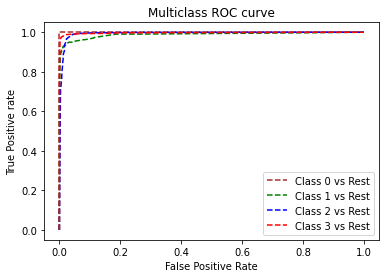

roc_auc_score: 0.994
-----------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
[[   2    0   22   15]
 [   0    8    8    1]
 [   0  617 7587  530]
 [   0   11  306 1237]]
Print Class: 0
TP=2, FN=37, TN=10305, FP=0
Accuracy: 0.996
Precision: 1.0
Sensitivity: 0.051
F1-Score: 0.098
Specificity: 1.0
Balanced Accuracy: 0.526
MCC: 0.226

Print Class: 1
TP=8, FN=9, TN=9699, FP=628
Accuracy: 0.938
Precision: 0.013
Sensitivity: 0.471
F1-Score: 0.025
Specificity: 0.939
Balanced Accuracy: 0.705
MCC: 0.069

Print Class: 2
TP=7587, FN=1147, TN=1274, FP=336
Accuracy: 0.857
Precision: 0.958
Sensitivity: 0.869
F1-Score: 0.911
Specificity: 0.791
Balanced Accuracy: 0.83
MCC: 0.565

Print Class: 3
TP=1237, FN=317, TN=8244, FP=546
Accuracy: 0.917
Precision: 0.694
Sensitivity: 0.796
F1-Score: 0.741
Specificity: 0.938
Balanced Accuracy: 0.867
MCC: 0.694

Overall Performance Prediction:
Accuracy: 92.7%
Precision: 66.625%
Recall 

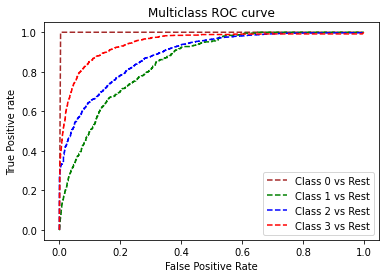

roc_auc_score: 0.916
-----------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
[[   0    0    0    0]
 [   0    0    0    0]
 [   1  632 7602  798]
 [   1    4  321  985]]
Print Class: 0
TP=0, FN=0, TN=10342, FP=2
Accuracy: 1.0
Precision: 0.0
Sensitivity: nan
F1-Score: 0.0
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 1
TP=0, FN=0, TN=9708, FP=636
Accuracy: 0.939
Precision: 0.0
Sensitivity: nan
F1-Score: 0.0
Specificity: 0.939
Balanced Accuracy: nan
MCC: nan

Print Class: 2
TP=7602, FN=1431, TN=990, FP=321
Accuracy: 0.831
Precision: 0.959
Sensitivity: 0.842
F1-Score: 0.897
Specificity: 0.755
Balanced Accuracy: 0.798
MCC: 0.469

Print Class: 3
TP=985, FN=326, TN=8235, FP=798
Accuracy: 0.891
Precision: 0.552
Sensitivity: 0.751
F1-Score: 0.637
Specificity: 0.912
Balanced Accuracy: 0.832
MCC: 0.584

Overall Performance Prediction:
Accuracy: 91.525%
Precision: 37.775%
Recall or Sensitivity: nan%
F1-Sco

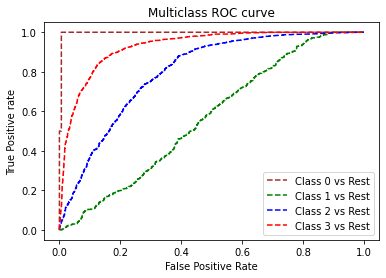

roc_auc_score: 0.81
-----------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)
[[   2    0    0    0]
 [   0   29    2    1]
 [   0  598 7619  418]
 [   0    9  302 1364]]
Print Class: 0
TP=2, FN=0, TN=10342, FP=0
Acc

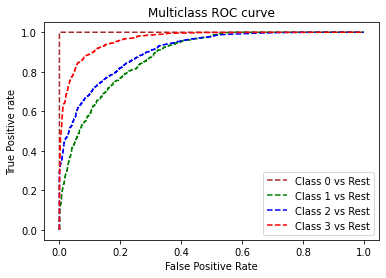

roc_auc_score: 0.933
-----------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
[[   2    0    0    0]
 [   0  181   11    2]
 [   0  442 7778  267]
 [   0   13  134 1514]]
Print Class: 0
TP=2, FN=0, TN=10342, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=181, FN=13, TN=9695, FP=455
Accuracy: 0.955
Precision: 0.285
Sensitivity: 0.933
F1-Score: 0.436
Specificity: 0.955
Balanced Accuracy: 0.944
MCC: 0.502

Print Class: 2
TP=7778, FN=709, TN=1712, FP=145
Accuracy: 0.917
Precision: 0.982
Sensitivity: 0.916
F1-Score: 0.948
Specificity: 0.922
Balanced Accuracy: 0.919
MCC: 0.76

Print Class: 3
TP=1514, FN=147, TN=8414, FP=269
Accuracy: 0.96
Precision: 0.849
Sensitivity: 0.911
F1-Score: 0.879
Specificity: 0.969
Balanced Accuracy: 0.94
MCC: 0.856

Overall Performance Prediction:
Accuracy: 95.8%
Precision: 77.9%
Recall or Sensitivity: 94.0%
F1-

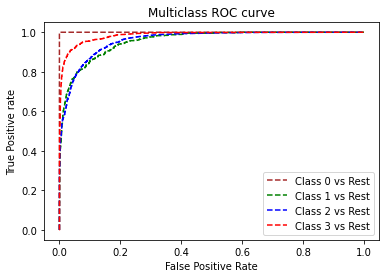

roc_auc_score: 0.972
-----------------------------------------------------------------------------------------------


In [35]:
# To build the 'Multinominal Regression' models with random sampling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Create an object for model

dfLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=42)
dfDT = DecisionTreeClassifier()
dfRF = RandomForestClassifier()
dfET = ExtraTreesClassifier()
dfKNN = KNeighborsClassifier(n_neighbors=5)
dfGNB = GaussianNB()
dfSVC = SVC(probability=True)
dfBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)
dfGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3)
dfXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
dfLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [dfLR, dfDT, dfRF, dfET, dfKNN,dfGNB, dfBAG,dfGB,dfSVC , dfXGB, dfLGB]
for models in MM:
    
    # Train the model with training data
    models.fit(x_train,y_train)

    # Predict the model with test data set

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob

    # Class = Label 0-12

    lst_classes = [0, 1, 2, 3]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)
    
    # Temp store results

    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];

    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
    
        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
    
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
        # OVERALL - FINAL PREDICTION PERFORMANCE
        # importing mean()
   
    from statistics import mean
    import math
    
    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))
    
    
    # ROC curve for Multi classes 
    
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}
        
    n_class = 4

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Log_ROC')
    plt.show()
    
    # ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
    # all other classes. 
    
    print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
    
    print('-----------------------------------------------------------------------------------------------')
    
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : round(mean(model_acc)*100, 4),
               'Precision' : round(mean(model_prec)*100, 4),
               'Recall' : round(mean(model_recall)*100, 4),
               'F1 Score' : round(mean(model_fscore), 4),
               'Specificity' : round(mean(model_spec)*100, 4),
               'MCC':round(mean(model_mcc), 4),
               'ROC_AUC_Score' : round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3) ,
               'Balanced Accuracy': round(mean(model_bal_acc)*100, 4)}
    Results = Results.append(new_row, ignore_index=True)

In [36]:
Results.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"LogisticRegression(multi_class='multinomial', ...",923,286,860,8275,91.4,37.075,NaN,0.3782,90.375,NaN,0.818,NaN
1,DecisionTreeClassifier(),1705,60,78,8501,98.5,95.325,94.775,0.9502,98.0,0.9308,0.967,96.4
2,"(DecisionTreeClassifier(max_features='auto', r...",1700,38,83,8523,98.625,92.725,97.825,0.95,98.775,0.933,0.994,98.3
3,"(ExtraTreeClassifier(random_state=1130007044),...",1694,43,89,8518,98.475,92.4,96.95,0.9442,98.575,0.9252,0.993,97.75
4,KNeighborsClassifier(),1637,175,146,8386,96.8,88.425,81.625,0.8415,95.875,0.803,0.977,88.75
5,GaussianNB(),1126,624,657,7937,90.75,63.825,NaN,0.4175,87.75,NaN,0.819,NaN
6,(DecisionTreeClassifier(random_state=171011636...,1723,36,60,8525,99.0,95.65,97.875,0.9672,98.95,0.954,0.994,98.4
7,([DecisionTreeRegressor(criterion='friedman_ms...,1237,317,546,8244,92.7,66.625,54.675,0.4438,91.7,0.3885,0.916,73.2
8,SVC(probability=True),985,326,798,8235,91.525,37.775,NaN,0.3835,90.15,NaN,0.81,NaN
9,"XGBClassifier(base_score=0.5, booster='gbtree'...",1364,311,419,8250,93.55,69.325,90.05,0.699,92.875,0.6402,0.933,91.475


In [37]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'V24':lst_actual_class, 'V24_Pred':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,V24,V24_Pred
5297,1,0,113,52,27,1524,1000.0,2,2,3
755,0,0,0,1,78,2473,150.0,4,2,2
8007,0,0,161,89,28,850,1200.0,4,3,3
1031,1,0,37,29,92,2418,250.0,2,2,2
7255,0,0,40,56,26,735,400.0,2,2,2
6704,0,0,23,71,8,1391,2000.0,6,2,2
10118,0,0,0,3,78,2016,300.0,2,3,2
7027,1,0,36,26,92,2096,300.0,2,2,2
8890,1,0,0,41,78,2687,150.0,2,2,2
8820,1,0,10,0,0,272,450.0,2,2,2


In [38]:
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"LogisticRegression(multi_class='multinomial', ...",923,286,860,8275,91.4,37.075,NaN,0.3782,90.375,NaN,0.818,NaN
1,DecisionTreeClassifier(),1705,60,78,8501,98.5,95.325,94.775,0.9502,98.0,0.9308,0.967,96.4
2,"(DecisionTreeClassifier(max_features='auto', r...",1700,38,83,8523,98.625,92.725,97.825,0.95,98.775,0.933,0.994,98.3
3,"(ExtraTreeClassifier(random_state=1130007044),...",1694,43,89,8518,98.475,92.4,96.95,0.9442,98.575,0.9252,0.993,97.75
4,KNeighborsClassifier(),1637,175,146,8386,96.8,88.425,81.625,0.8415,95.875,0.803,0.977,88.75
5,GaussianNB(),1126,624,657,7937,90.75,63.825,NaN,0.4175,87.75,NaN,0.819,NaN
6,(DecisionTreeClassifier(random_state=171011636...,1723,36,60,8525,99.0,95.65,97.875,0.9672,98.95,0.954,0.994,98.4
7,([DecisionTreeRegressor(criterion='friedman_ms...,1237,317,546,8244,92.7,66.625,54.675,0.4438,91.7,0.3885,0.916,73.2
8,SVC(probability=True),985,326,798,8235,91.525,37.775,NaN,0.3835,90.15,NaN,0.81,NaN
9,"XGBClassifier(base_score=0.5, booster='gbtree'...",1364,311,419,8250,93.55,69.325,90.05,0.699,92.875,0.6402,0.933,91.475


# BG_Hyperparameter tuning with RandomizedSearchCV

In [39]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# splitter in Decision Tree

n_estimators=[100,300,500,800,1200]

# Number of features to consider at every split

max_features = [1,2,5,10,13]

# Minimum number of samples required to split a node

max_samples = [5, 10,25,50,100]


# Create the random grid
bootstrap=[True,False]

Random_Grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
               'bootstrap':[True,False]}

print(Random_Grid)

{'n_estimators': [100, 300, 500, 800, 1200], 'max_features': [1, 2, 5, 10, 13], 'max_samples': [5, 10, 25, 50, 100], 'bootstrap': [True, False]}


In [40]:
# prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [41]:
from sklearn.ensemble import BaggingClassifier

df1 = BaggingClassifier()

dfBG_RandomCV=RandomizedSearchCV(estimator=df1 , param_distributions=Random_Grid, n_iter=100, cv=3,
                                    verbose=2, random_state=100,n_jobs=-1)
### fit the randomized model

dfBG_RandomCV.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=BaggingClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [1, 2, 5, 10, 13],
                                        'max_samples': [5, 10, 25, 50, 100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   random_state=100, verbose=2)

In [42]:
# best or the optimal values of the parameters for which the model performed the best

dfBG_RandomCV.best_params_

{'n_estimators': 500,
 'max_samples': 100,
 'max_features': 5,
 'bootstrap': False}

[[   0    0    0    0]
 [   0    0    0    0]
 [   1  626 7630  749]
 [   1   10  293 1034]]
Print Class: 0
TP=0, FN=0, TN=10342, FP=2
Accuracy: 1.0
Precision: 0.0
Sensitivity: nan
F1-Score: 0.0
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 1
TP=0, FN=0, TN=9708, FP=636
Accuracy: 0.939
Precision: 0.0
Sensitivity: nan
F1-Score: 0.0
Specificity: 0.939
Balanced Accuracy: nan
MCC: nan

Print Class: 2
TP=7630, FN=1376, TN=1045, FP=293
Accuracy: 0.839
Precision: 0.963
Sensitivity: 0.847
F1-Score: 0.901
Specificity: 0.781
Balanced Accuracy: 0.814
MCC: 0.498

Print Class: 3
TP=1034, FN=304, TN=8257, FP=749
Accuracy: 0.898
Precision: 0.58
Sensitivity: 0.773
F1-Score: 0.663
Specificity: 0.917
Balanced Accuracy: 0.845
MCC: 0.613

Overall Performance Prediction:
Accuracy: 91.9%
Precision: 38.575%
Recall or Sensitivity: nan%
F1-Score: 0.391
Specificity or True Nagative Rate: 90.925%
Balanced Accuracy: nan%

MCC: nan

roc_auc_score: 0.873
--------------------------------------------

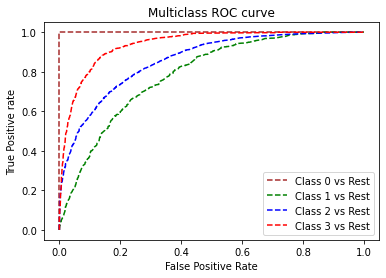

In [43]:
# To build the 'Logistic Regression' model with random sampling (RandomizedSearchCV)

from sklearn.ensemble import BaggingClassifier

# Create model object

ModelBG = BaggingClassifier(n_estimators=500,max_samples=100,max_features=5,bootstrap=False)

# Train the model with training data

ModelBG = ModelBG.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelBG.predict(x_test)
y_pred_prob = ModelBG.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelBG,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : round(mean(model_acc)*100, 4),
           'Precision' : round(mean(model_prec)*100, 4),
           'Recall' : round(mean(model_recall)*100, 4),
           'F1 Score' : round(mean(model_fscore), 4),
           'Specificity' : round(mean(model_spec)*100, 4),
           'MCC':round(mean(model_mcc), 4),
           'ROC_AUC_Score':round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3),
           'Balanced Accuracy':round(mean(model_bal_acc)*100, 4)}
Results = Results.append(new_row, ignore_index=True)
#---------------------------------------------------------

In [44]:
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"LogisticRegression(multi_class='multinomial', ...",923,286,860,8275,91.4,37.075,NaN,0.3782,90.375,NaN,0.818,NaN
1,DecisionTreeClassifier(),1705,60,78,8501,98.5,95.325,94.775,0.9502,98.0,0.9308,0.967,96.4
2,"(DecisionTreeClassifier(max_features='auto', r...",1700,38,83,8523,98.625,92.725,97.825,0.95,98.775,0.933,0.994,98.3
3,"(ExtraTreeClassifier(random_state=1130007044),...",1694,43,89,8518,98.475,92.4,96.95,0.9442,98.575,0.9252,0.993,97.75
4,KNeighborsClassifier(),1637,175,146,8386,96.8,88.425,81.625,0.8415,95.875,0.803,0.977,88.75
5,GaussianNB(),1126,624,657,7937,90.75,63.825,NaN,0.4175,87.75,NaN,0.819,NaN
6,(DecisionTreeClassifier(random_state=171011636...,1723,36,60,8525,99.0,95.65,97.875,0.9672,98.95,0.954,0.994,98.4
7,([DecisionTreeRegressor(criterion='friedman_ms...,1237,317,546,8244,92.7,66.625,54.675,0.4438,91.7,0.3885,0.916,73.2
8,SVC(probability=True),985,326,798,8235,91.525,37.775,NaN,0.3835,90.15,NaN,0.81,NaN
9,"XGBClassifier(base_score=0.5, booster='gbtree'...",1364,311,419,8250,93.55,69.325,90.05,0.699,92.875,0.6402,0.933,91.475


# ET_Hyperparameter tuning with GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

Grid_Params = {'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
               }

ModelBG = BaggingClassifier(n_estimators=10,max_features=0.5,max_samples=0.5,bootstrap=True)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator=ModelBG, param_grid=Grid_Params, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(max_features=0.5, max_samples=0.5),
             n_jobs=-1,
             param_grid={'bootstrap_features': [False, True],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20]},
             verbose=2)

In [47]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 20}

[[   2    0    0    0]
 [   0  560  103    9]
 [   0   71 7774   66]
 [   0    5   46 1708]]
Print Class: 0
TP=2, FN=0, TN=10342, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=560, FN=112, TN=9596, FP=76
Accuracy: 0.982
Precision: 0.881
Sensitivity: 0.833
F1-Score: 0.856
Specificity: 0.992
Balanced Accuracy: 0.912
MCC: 0.847

Print Class: 2
TP=7774, FN=137, TN=2284, FP=149
Accuracy: 0.972
Precision: 0.981
Sensitivity: 0.983
F1-Score: 0.982
Specificity: 0.939
Balanced Accuracy: 0.961
MCC: 0.923

Print Class: 3
TP=1708, FN=51, TN=8510, FP=75
Accuracy: 0.988
Precision: 0.958
Sensitivity: 0.971
F1-Score: 0.964
Specificity: 0.991
Balanced Accuracy: 0.981
MCC: 0.957

Overall Performance Prediction:
Accuracy: 98.55%
Precision: 95.5%
Recall or Sensitivity: 94.675%
F1-Score: 0.9505
Specificity or True Nagative Rate: 98.05%
Balanced Accuracy: 96.35%

MCC: 0.9318

roc_auc_score: 0.972
--------------------------

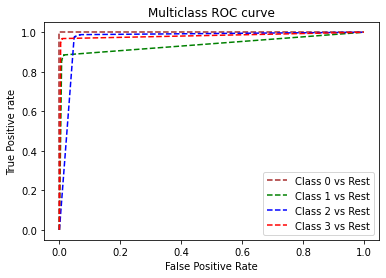

In [48]:
# To build the 'Decision Tree' model Random sampling - Hyperparameter tuning with GridSearchCV  

from sklearn.ensemble import BaggingClassifier

ModelBG = BaggingClassifier(n_estimators=20,max_samples=1.0,max_features=1.0,bootstrap=False)

# Train the model with training data

ModelBG = ModelBG.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelBG.predict(x_test)
y_pred_prob = ModelBG.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))

print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelBG,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : round(mean(model_acc)*100, 4),
           'Precision' : round(mean(model_prec)*100, 4),
           'Recall' : round(mean(model_recall)*100, 4),
           'F1 Score' : round(mean(model_fscore), 4),
           'Specificity' : round(mean(model_spec)*100, 4),
           'MCC':round(mean(model_mcc), 4),
           'ROC_AUC_Score':round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3),
           'Balanced Accuracy':round(mean(model_bal_acc)*100, 4)}
Results = Results.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [49]:
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"LogisticRegression(multi_class='multinomial', ...",923,286,860,8275,91.4,37.075,NaN,0.3782,90.375,NaN,0.818,NaN
1,DecisionTreeClassifier(),1705,60,78,8501,98.5,95.325,94.775,0.9502,98.0,0.9308,0.967,96.4
2,"(DecisionTreeClassifier(max_features='auto', r...",1700,38,83,8523,98.625,92.725,97.825,0.95,98.775,0.933,0.994,98.3
3,"(ExtraTreeClassifier(random_state=1130007044),...",1694,43,89,8518,98.475,92.4,96.95,0.9442,98.575,0.9252,0.993,97.75
4,KNeighborsClassifier(),1637,175,146,8386,96.8,88.425,81.625,0.8415,95.875,0.803,0.977,88.75
5,GaussianNB(),1126,624,657,7937,90.75,63.825,NaN,0.4175,87.75,NaN,0.819,NaN
6,(DecisionTreeClassifier(random_state=171011636...,1723,36,60,8525,99.0,95.65,97.875,0.9672,98.95,0.954,0.994,98.4
7,([DecisionTreeRegressor(criterion='friedman_ms...,1237,317,546,8244,92.7,66.625,54.675,0.4438,91.7,0.3885,0.916,73.2
8,SVC(probability=True),985,326,798,8235,91.525,37.775,NaN,0.3835,90.15,NaN,0.81,NaN
9,"XGBClassifier(base_score=0.5, booster='gbtree'...",1364,311,419,8250,93.55,69.325,90.05,0.699,92.875,0.6402,0.933,91.475
